<a href="https://colab.research.google.com/github/juhumkwon/Defense_Cloud/blob/main/A_11_0_1_%EC%95%B5%EC%BB%A4%EC%83%9D%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

총 앵커박스 수: 48
샘플 앵커박스 (x_min, y_min, x_max, y_max):
[[  9.372583 -13.254833  54.62742   77.25484 ]
 [  0.         0.        64.        64.      ]
 [-13.254833   9.372583  77.25484   54.62742 ]
 [ 73.37258  -13.254833 118.62742   77.25484 ]
 [ 64.         0.       128.        64.      ]]


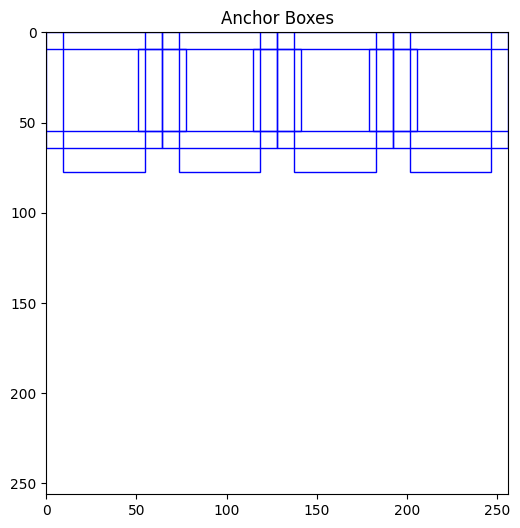

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def generate_anchor_wh_tf(scale, aspect_ratios):
    r = tf.constant(aspect_ratios, dtype=tf.float32)
    s = tf.constant(scale, dtype=tf.float32)

    w = s * tf.sqrt(r)
    h = s / tf.sqrt(r)
    return tf.stack([w, h], axis=1)  # (num_ratios, 2)

def generate_anchors(feature_map_size, stride, scale, aspect_ratios):
    fm_h, fm_w = feature_map_size
    anchors = []
    anchor_wh_tensor = generate_anchor_wh_tf(scale, aspect_ratios)  # (num_ratios, 2)
    # Convert the tensor to a NumPy array for easier iteration
    anchor_wh = anchor_wh_tensor.numpy()

    for i in range(fm_h):
        for j in range(fm_w):
            cx = (j + 0.5) * stride
            cy = (i + 0.5) * stride
            # Iterate over the NumPy array
            for w, h in anchor_wh:
                x_min = cx - w / 2
                y_min = cy - h / 2
                x_max = cx + w / 2
                y_max = cy + h / 2
                # Ensure the values are standard Python floats before appending
                anchors.append([float(x_min), float(y_min), float(x_max), float(y_max)])

    return tf.constant(anchors, dtype=tf.float32)  # (total_anchors, 4)

# 설정
image_size = 256
feature_map_size = (4, 4)  # 피처맵 크기
stride = image_size // feature_map_size[0]  # 64
scale = 64
aspect_ratios = [0.5, 1.0, 2.0]

# 앵커박스 생성
anchors = generate_anchors(feature_map_size, stride, scale, aspect_ratios)
print("총 앵커박스 수:", anchors.shape[0])
print("샘플 앵커박스 (x_min, y_min, x_max, y_max):")
print(anchors[:5].numpy())

# 시각화 (선택)
def plot_anchors(anchors, image_size):
    plt.figure(figsize=(6, 6))
    # Convert anchors to NumPy for plotting
    anchors_np = anchors.numpy()
    for box in anchors_np:
        x_min, y_min, x_max, y_max = box
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                             fill=False, edgecolor='blue', linewidth=1)
        plt.gca().add_patch(rect)
    plt.xlim(0, image_size)
    plt.ylim(0, image_size)
    plt.gca().set_aspect('equal')
    plt.title("Anchor Boxes")
    plt.gca().invert_yaxis()
    plt.show()

# 시각화 실행
plot_anchors(anchors[:12], image_size)  # 일부만 그림